# Predict King House Prices using Different Machine Learnring Techniques. Select the optimal set of features

# Problem Definition

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

The attributes are defined as follows:

1. id: a notation for a house
2. date: Date house was sold
3. price: Price is prediction target
4. bedrooms: Number of Bedrooms/House
5. bathrooms: Number of bathrooms/bedrooms
6. sqft_living: square footage of the home
7. sqft_lots: quare footage of the lot
8. floors: Total floors (levels) in house
9. waterfront: House which has a view to a waterfront
10. view: Has been viewed
11. condition: How good the condition is ( Overall )
12. gradeoverall: grade given to the housing unit, based on King County grading system
13. sqft_above: square footage of house apart from basement
14. sqft_basement: square footage of the basement
15. yr_built: Built Year
16. yr_renovated: Year when house was renovated
17. zipcode: zip
18. lat: Latitude coordinate
19. long: Longitude coordinate
20. sqft_living15: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
21. sqft_lot15: lotSize area in 2015(implies-- some renovations)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
import seaborn as sn
%matplotlib inline

In [3]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [4]:
# Load dataset
data = pd.read_csv('kc_house_data.csv')

In [5]:
data.shape

(21613, 21)

In [6]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
data.drop('id', axis =1, inplace = True)

In [9]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
data.drop('date', axis =1, inplace = True)

In [11]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [12]:
data.shape

(21613, 19)

In [17]:
x = data.drop('price', axis = 1)
y = data[['price']]

In [18]:
x.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [19]:
y.head()

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 1)

# Linear Regression

In [21]:
print('Training dataset shape:', x_train.shape, y_train.shape)
print('Testing dataset shape:', x_test.shape, y_test.shape)

Training dataset shape: (15129, 18) (15129, 1)
Testing dataset shape: (6484, 18) (6484, 1)


In [22]:
# Build Lin Reg  to use in feature selection
linR = LinearRegression()

In [23]:
# Build step forward feature selection
sfs1 = sfs(linR, k_features=18, forward=True, scoring='r2', cv=5)

In [24]:
# Perform SFFS
sfs1 = sfs1.fit(x_train.values, y_train.values)

In [25]:
sfs1.get_metric_dict()

{1: {'feature_idx': (2,),
  'cv_scores': array([0.48175174, 0.47656766, 0.45951105, 0.51305393, 0.49574751]),
  'avg_score': 0.48532638089541874,
  'feature_names': ('2',),
  'ci_bound': 0.02323030772061808,
  'std_dev': 0.018073968616545293,
  'std_err': 0.009036984308272647},
 2: {'feature_idx': (2, 14),
  'cv_scores': array([0.57471031, 0.55639929, 0.56054716, 0.58171282, 0.56154082]),
  'avg_score': 0.5669820789082498,
  'feature_names': ('2', '14'),
  'ci_bound': 0.01232447323592124,
  'std_dev': 0.009588858880409452,
  'std_err': 0.004794429440204725},
 3: {'feature_idx': (2, 6, 14),
  'cv_scores': array([0.62211098, 0.60780624, 0.60248249, 0.61743273, 0.60269864]),
  'avg_score': 0.61050621550156,
  'feature_names': ('2', '6', '14'),
  'ci_bound': 0.0102061400016495,
  'std_dev': 0.007940723657403736,
  'std_err': 0.003970361828701867},
 4: {'feature_idx': (2, 6, 8, 14),
  'cv_scores': array([0.65049895, 0.63031676, 0.63835305, 0.64232319, 0.63144473]),
  'avg_score': 0.63858733

In [26]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

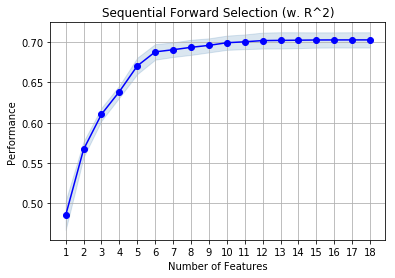

In [27]:
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [28]:
columnList = list(x_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


In [29]:
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


# Building Full Model on All Features

In [30]:
linR = LinearRegression()
linR.fit(x_train[subsetColumnList], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
y_train_pred = linR.predict(x_train[subsetColumnList])
print('Training accuracy on selected features: %.3f' % linR.score(x_train[subsetColumnList], y_train))

Training accuracy on selected features: 0.704


In [32]:
y_test_pred = linR.predict(x_test[subsetColumnList])
print('Testing accuracy on selected features: %.3f' % linR.score(x_test[subsetColumnList], y_test))

Testing accuracy on selected features: 0.691


# Building model with 10 selected features

In [33]:
# Build step forward feature selection
sfs2 = sfs(linR, k_features=10, forward=True, scoring='r2', cv=5)

In [34]:
# Perform SFFS
sfs2 = sfs2.fit(x_train.values, y_train.values)

In [35]:
sfs2.get_metric_dict()

{1: {'feature_idx': (2,),
  'cv_scores': array([0.48175174, 0.47656766, 0.45951105, 0.51305393, 0.49574751]),
  'avg_score': 0.48532638089541874,
  'feature_names': ('2',),
  'ci_bound': 0.02323030772061808,
  'std_dev': 0.018073968616545293,
  'std_err': 0.009036984308272647},
 2: {'feature_idx': (2, 14),
  'cv_scores': array([0.57471031, 0.55639929, 0.56054716, 0.58171282, 0.56154082]),
  'avg_score': 0.5669820789082498,
  'feature_names': ('2', '14'),
  'ci_bound': 0.01232447323592124,
  'std_dev': 0.009588858880409452,
  'std_err': 0.004794429440204725},
 3: {'feature_idx': (2, 6, 14),
  'cv_scores': array([0.62211098, 0.60780624, 0.60248249, 0.61743273, 0.60269864]),
  'avg_score': 0.61050621550156,
  'feature_names': ('2', '6', '14'),
  'ci_bound': 0.0102061400016495,
  'std_dev': 0.007940723657403736,
  'std_err': 0.003970361828701867},
 4: {'feature_idx': (2, 6, 8, 14),
  'cv_scores': array([0.65049895, 0.63031676, 0.63835305, 0.64232319, 0.63144473]),
  'avg_score': 0.63858733

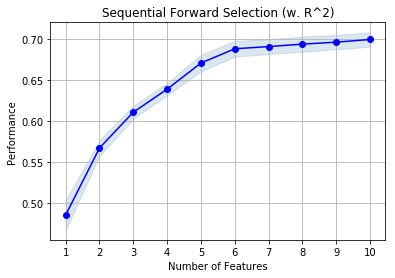

In [36]:
fig2 = plot_sfs(sfs2.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [37]:
columnList = list(x_train.columns)
feat_cols = list(sfs2.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 5, 6, 8, 11, 13, 14, 15]


In [38]:
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'view', 'grade', 'yr_built', 'zipcode', 'lat', 'long']


In [39]:
linR = LinearRegression()
linR.fit(x_train[subsetColumnList], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
y_train_pred = linR.predict(x_train[subsetColumnList])
print('Training accuracy on selected features: %.3f' % linR.score(x_train[subsetColumnList], y_train))

Training accuracy on selected features: 0.700


In [41]:
y_test_pred = linR.predict(x_test[subsetColumnList])
print('Testing accuracy on selected features: %.3f' % linR.score(x_test[subsetColumnList], y_test))

Testing accuracy on selected features: 0.688


### Backward elimination

In [51]:
# Build step backward feature elimination
sfs3 = sfs(linR, k_features=8, scoring='r2', cv=5)

In [52]:
# Perform SFFS
sfs3 = sfs3.fit(x_train, y_train)

In [53]:
sfs3.get_metric_dict()

{1: {'feature_idx': (2,),
  'cv_scores': array([0.48175174, 0.47656766, 0.45951105, 0.51305393, 0.49574751]),
  'avg_score': 0.48532638089541874,
  'feature_names': ('sqft_living',),
  'ci_bound': 0.02323030772061808,
  'std_dev': 0.018073968616545293,
  'std_err': 0.009036984308272647},
 2: {'feature_idx': (2, 14),
  'cv_scores': array([0.57471031, 0.55639929, 0.56054716, 0.58171282, 0.56154082]),
  'avg_score': 0.5669820789082498,
  'feature_names': ('sqft_living', 'lat'),
  'ci_bound': 0.01232447323592124,
  'std_dev': 0.009588858880409452,
  'std_err': 0.004794429440204725},
 3: {'feature_idx': (2, 6, 14),
  'cv_scores': array([0.62211098, 0.60780624, 0.60248249, 0.61743273, 0.60269864]),
  'avg_score': 0.61050621550156,
  'feature_names': ('sqft_living', 'view', 'lat'),
  'ci_bound': 0.0102061400016495,
  'std_dev': 0.007940723657403736,
  'std_err': 0.003970361828701867},
 4: {'feature_idx': (2, 6, 8, 14),
  'cv_scores': array([0.65049895, 0.63031676, 0.63835305, 0.64232319, 0.63

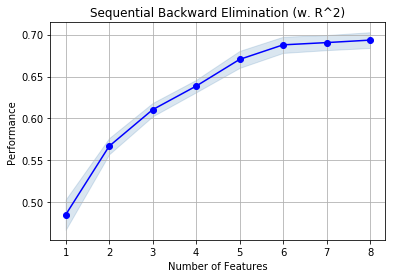

In [54]:
fig3 = plot_sfs(sfs3.get_metric_dict())

plt.title('Sequential Backward Elimination (w. R^2)')
plt.grid()
plt.show()

In [55]:
columnList = list(x_train.columns)
feat_cols = list(sfs3.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 5, 6, 8, 11, 14]


In [56]:
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'view', 'grade', 'yr_built', 'lat']


In [57]:
linR = LinearRegression()
linR.fit(x_train[subsetColumnList], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:
y_train_pred = linR.predict(x_train[subsetColumnList])
print('Training accuracy on selected features: %.3f' % linR.score(x_train[subsetColumnList], y_train))

Training accuracy on selected features: 0.694


In [59]:
y_test_pred = linR.predict(x_test[subsetColumnList])
print('Testing accuracy on selected features: %.3f' % linR.score(x_test[subsetColumnList], y_test))

Testing accuracy on selected features: 0.681


# Mixed Selection

In [70]:
# Build step backward feature elimination
sfs4 = sfs(linR, forward = True, floating = True, k_features=10, scoring='r2', cv=5)

In [71]:
# Perform SFFS
sfs4 = sfs4.fit(x_train.values, y_train.values)

In [72]:
sfs4.get_metric_dict()

{1: {'feature_idx': (2,),
  'cv_scores': array([0.48175174, 0.47656766, 0.45951105, 0.51305393, 0.49574751]),
  'avg_score': 0.48532638089541874,
  'feature_names': ('2',),
  'ci_bound': 0.02323030772061808,
  'std_dev': 0.018073968616545293,
  'std_err': 0.009036984308272647},
 2: {'feature_idx': (2, 14),
  'cv_scores': array([0.57471031, 0.55639929, 0.56054716, 0.58171282, 0.56154082]),
  'avg_score': 0.5669820789082498,
  'feature_names': ('2', '14'),
  'ci_bound': 0.01232447323592124,
  'std_dev': 0.009588858880409452,
  'std_err': 0.004794429440204725},
 3: {'feature_idx': (2, 6, 14),
  'cv_scores': array([0.62211098, 0.60780624, 0.60248249, 0.61743273, 0.60269864]),
  'avg_score': 0.61050621550156,
  'feature_names': ('2', '6', '14'),
  'ci_bound': 0.0102061400016495,
  'std_dev': 0.007940723657403736,
  'std_err': 0.003970361828701867},
 4: {'feature_idx': (2, 6, 8, 14),
  'cv_scores': array([0.65049895, 0.63031676, 0.63835305, 0.64232319, 0.63144473]),
  'avg_score': 0.63858733

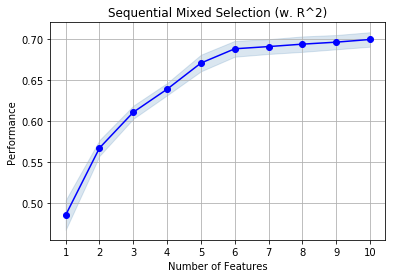

In [73]:
fig4 = plot_sfs(sfs4.get_metric_dict())

plt.title('Sequential Mixed Selection (w. R^2)')
plt.grid()
plt.show()

In [74]:
columnList = list(x_train.columns)
feat_cols = list(sfs4.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 5, 6, 8, 11, 13, 14, 15]


In [75]:
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'view', 'grade', 'yr_built', 'zipcode', 'lat', 'long']


In [76]:
linR = LinearRegression()
linR.fit(x_train[subsetColumnList], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [77]:
y_train_pred = linR.predict(x_train[subsetColumnList])
print('Training accuracy on selected features: %.3f' % linR.score(x_train[subsetColumnList], y_train))

Training accuracy on selected features: 0.700


In [78]:
y_test_pred = linR.predict(x_test[subsetColumnList])
print('Testing accuracy on selected features: %.3f' % linR.score(x_test[subsetColumnList], y_test))

Testing accuracy on selected features: 0.688
